# Dataset

In [2]:
from google.colab import files
uploades = files.upload()

Saving extended_salary_data.csv to extended_salary_data.csv


In [3]:
import pandas as pd
import numpy as np
sal = pd.read_csv('extended_salary_data.csv')
sal.head()

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


# Statistics of the Dataset

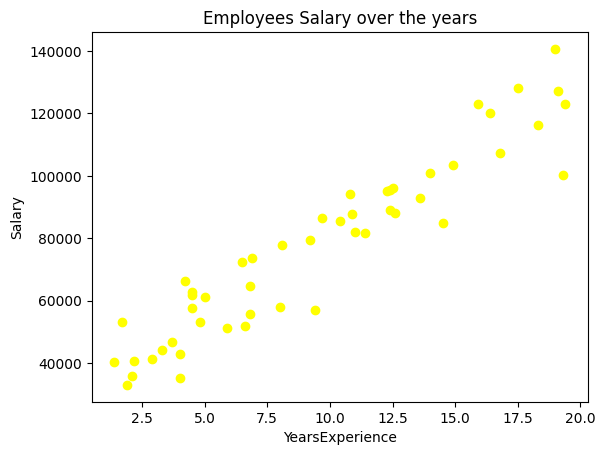

In [6]:
import matplotlib.pyplot as plt
plt.scatter(sal['YearsExperience'] , sal['Salary'] , color='yellow')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Employees Salary over the years')
plt.show()

In [7]:
sal.describe()


,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [8]:
sal.var()

,0
YearsExperience,3.009061e+01
Salary,8.008291e+08


# Building Linear Regression Model


In [23]:
class LRModel():
  def __init__(self, learning_rate, iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = None

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.weights = np.zeros(self.n)
    self.bias = 0
    self.X = X
    self.Y = Y

    for i in range(self.iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    dweights = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    dbias = - 2 * np.sum(self.Y - Y_prediction) / self.m
    self.weights = self.weights - self.learning_rate * dweights
    self.bias = self.bias - self.learning_rate * dbias

  def predict(self, X):
      return X.dot(self.weights) + self.bias

# Training The Model

In [14]:
X = sal.iloc[:, :-1].values
Y = sal.iloc[:,1].values
print(X)


[[ 8.1]
 [19.1]
 [14.9]
 [12.4]
 [ 4. ]
 [ 4. ]
 [ 2.1]
 [17.5]
 [12.4]
 [14.5]
 [ 1.4]
 [19.4]
 [16.8]
 [ 5. ]
 [ 4.5]
 [ 4.5]
 [ 6.8]
 [11. ]
 [ 9.2]
 [ 6.5]
 [12.6]
 [ 3.7]
 [ 6.6]
 [ 8. ]
 [ 9.7]
 [15.9]
 [ 4.8]
 [10.8]
 [12.3]
 [ 1.9]
 [12.5]
 [ 4.2]
 [ 2.2]
 [19. ]
 [19.3]
 [16.4]
 [ 6.8]
 [ 2.9]
 [14. ]
 [ 9.4]
 [ 3.3]
 [10.4]
 [ 1.7]
 [18.3]
 [ 5.9]
 [13.6]
 [ 6.9]
 [10.9]
 [11.4]
 [ 4.5]]


In [15]:
print(Y)

[ 77884.67 127213.68 103343.52  88988.96  35214.78  42801.56  35893.61
 128071.22  95436.18  84869.6   40240.84 123149.18 107230.78  61116.76
  62810.    61812.8   55607.82  81907.88  79312.63  72255.45  88208.26
  46643.41  51936.65  58037.93  86625.26 123062.4   53279.9   94035.33
  95116.36  33048.8   96113.96  66380.37  40641.74 140646.44 100302.55
 120219.03  64870.47  41509.93 100917.61  57124.31  44303.28  85571.13
  53278.94 116317.3   51415.06  92982.43  73654.02  87787.51  81702.4
  57632.67]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25 , random_state=5)
print(X_train.shape , X_test.shape)
print(Y_train, Y_test)

(37, 1) (13, 1)
[ 77884.67  58037.93  42801.56  81702.4  100302.55  41509.93  53279.9
  85571.13 140646.44  86625.26  40240.84  51415.06 123062.4   79312.63
  51936.65  88208.26  57632.67 127213.68 123149.18  61116.76  44303.28
  73654.02  61812.8  107230.78 128071.22  92982.43  96113.96  94035.33
  57124.31  64870.47  95436.18  84869.6   55607.82 100917.61  87787.51
  62810.   120219.03] [ 53278.94  33048.8   35893.61  72255.45  95116.36  81907.88 103343.52
 116317.3   88988.96  46643.41  66380.37  35214.78  40641.74]


In [24]:
Salaries = LRModel(learning_rate=0.007, iterations=2000)
Salaries.fit(X_train , Y_train)

In [26]:
print("Slope is :" , Salaries.weights)
print("Intercept is :" , Salaries.bias)

Slope is : [4938.83147483]
Intercept is : 30484.44186113187


# Evaluation of the Model

Prediction

In [28]:
print(Y_test)
test_prediction = Salaries.predict(X_test)
print(test_prediction)

[ 53278.94  33048.8   35893.61  72255.45  95116.36  81907.88 103343.52
 116317.3   88988.96  46643.41  66380.37  35214.78  40641.74]
[ 38880.45536835  39868.22166332  40855.98795828  62586.84644756
  91232.0690016   84811.58808431 104073.03083617 120865.05785061
  91725.95214908  48758.11831802  51227.53405544  50239.76776047
  41349.87110577]


Errors


Mean Absolute Error

In [29]:
mae = np.mean(np.abs(Y_test - test_prediction))
print("Mean Absolute Error :" , mae)

Mean Absolute Error : 6434.754681006622


Mean Square Error

In [30]:
mse = np.mean(np.square(Y_test - test_prediction))
print("Mean Square Error :" , mse)

Mean Square Error : 68037288.24728161


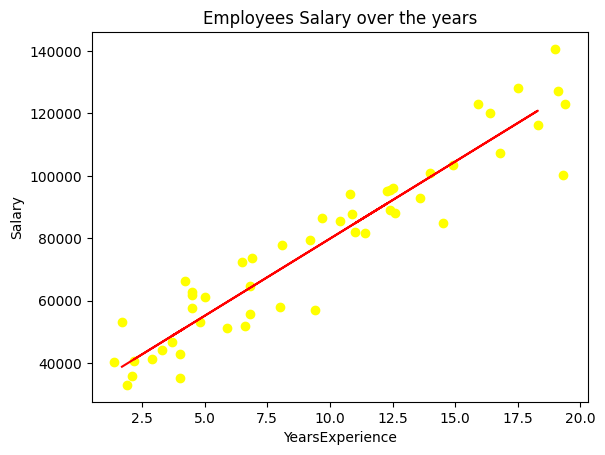

In [31]:
plt.scatter(sal['YearsExperience'] , sal['Salary'] , color='yellow')
plt.plot(X_test , test_prediction , color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Employees Salary over the years')
plt.show()

# Bonus Task
We will build another Linear Regression Model using Multiple Variables to predict Salary

In [46]:
import random
bonus = random.randint(0,3)

x = sal['YearsExperience']

Num_Projects = (x/4 + bonus )
Num_Projects = round(Num_Projects)
print(Num_Projects)

sal['Num_Projects'] = Num_Projects
sal.head(10)

0     2.0
1     5.0
2     4.0
3     3.0
4     1.0
5     1.0
6     1.0
7     4.0
8     3.0
9     4.0
10    0.0
11    5.0
12    4.0
13    1.0
14    1.0
15    1.0
16    2.0
17    3.0
18    2.0
19    2.0
20    3.0
21    1.0
22    2.0
23    2.0
24    2.0
25    4.0
26    1.0
27    3.0
28    3.0
29    0.0
30    3.0
31    1.0
32    1.0
33    5.0
34    5.0
35    4.0
36    2.0
37    1.0
38    4.0
39    2.0
40    1.0
41    3.0
42    0.0
43    5.0
44    1.0
45    3.0
46    2.0
47    3.0
48    3.0
49    1.0
Name: YearsExperience, dtype: float64


,YearsExperience,Salary,Num_Projects
0,8.1,77884.67,2.0
1,19.1,127213.68,5.0
2,14.9,103343.52,4.0
3,12.4,88988.96,3.0
4,4.0,35214.78,1.0
5,4.0,42801.56,1.0
6,2.1,35893.61,1.0
7,17.5,128071.22,4.0
8,12.4,95436.18,3.0
9,14.5,84869.60,4.0


# Statistics

In [47]:
sal.describe()

,YearsExperience,Salary,Num_Projects
count,50.000000,50.00000,50.000000
mean,9.480000,77370.54740,2.400000
std,5.485491,28298.92442,1.442786
min,1.400000,33048.80000,0.000000
25%,4.500000,53861.88000,1.000000
50%,9.300000,78598.65000,2.000000
75%,13.350000,95356.22500,3.000000
max,19.400000,140646.44000,5.000000


Training of The Dataset

In [49]:
x = sal.drop('Salary' , axis = 1 ).values
y = sal['Salary'].values
print(x)

[[ 8.1  2. ]
 [19.1  5. ]
 [14.9  4. ]
 [12.4  3. ]
 [ 4.   1. ]
 [ 4.   1. ]
 [ 2.1  1. ]
 [17.5  4. ]
 [12.4  3. ]
 [14.5  4. ]
 [ 1.4  0. ]
 [19.4  5. ]
 [16.8  4. ]
 [ 5.   1. ]
 [ 4.5  1. ]
 [ 4.5  1. ]
 [ 6.8  2. ]
 [11.   3. ]
 [ 9.2  2. ]
 [ 6.5  2. ]
 [12.6  3. ]
 [ 3.7  1. ]
 [ 6.6  2. ]
 [ 8.   2. ]
 [ 9.7  2. ]
 [15.9  4. ]
 [ 4.8  1. ]
 [10.8  3. ]
 [12.3  3. ]
 [ 1.9  0. ]
 [12.5  3. ]
 [ 4.2  1. ]
 [ 2.2  1. ]
 [19.   5. ]
 [19.3  5. ]
 [16.4  4. ]
 [ 6.8  2. ]
 [ 2.9  1. ]
 [14.   4. ]
 [ 9.4  2. ]
 [ 3.3  1. ]
 [10.4  3. ]
 [ 1.7  0. ]
 [18.3  5. ]
 [ 5.9  1. ]
 [13.6  3. ]
 [ 6.9  2. ]
 [10.9  3. ]
 [11.4  3. ]
 [ 4.5  1. ]]


In [50]:
print(y)

[ 77884.67 127213.68 103343.52  88988.96  35214.78  42801.56  35893.61
 128071.22  95436.18  84869.6   40240.84 123149.18 107230.78  61116.76
  62810.    61812.8   55607.82  81907.88  79312.63  72255.45  88208.26
  46643.41  51936.65  58037.93  86625.26 123062.4   53279.9   94035.33
  95116.36  33048.8   96113.96  66380.37  40641.74 140646.44 100302.55
 120219.03  64870.47  41509.93 100917.61  57124.31  44303.28  85571.13
  53278.94 116317.3   51415.06  92982.43  73654.02  87787.51  81702.4
  57632.67]


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25 , random_state=6)

In [160]:
New_Salaries = LRModel(learning_rate=0.006, iterations=2000)
New_Salaries.fit(x_train , y_train)

In [161]:
print("Slope : " , New_Salaries.weights)
print("Intercept : " , New_Salaries.bias)

Slope :  [5375.99942223 -920.54730941]
Intercept :  28064.111330320968


In [162]:
prediction_test = New_Salaries.predict(x_test)
print(prediction_test)

[ 51335.56142096  44884.36211428  99645.91400394  69231.01208936
 118461.91198175  69768.61203159  38433.1628076  127218.16363236
  51335.56142096  49722.76159429  86588.86281554  78370.21110716
  61167.01295601]


Errors

Mean Absolute Error


In [163]:
mae = np.mean(np.abs(y_test - prediction_test))
print("Mean Absolute Error :" , mae)

Mean Absolute Error : 9145.038226345843


Mean Square Error

In [164]:
mse = np.mean(np.square(y_test - prediction_test))
print("Mean Square Error :" , mse)

Mean Square Error : 129239827.62326154


# Visualisation

<ipython-input-165-f037e1b4b3ab>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x, y, z,  cmap='Blues');


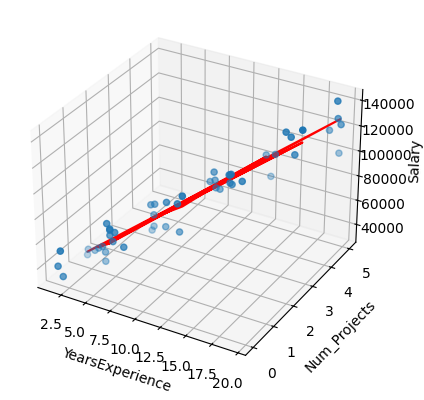

In [165]:
ax = plt.axes(projection='3d')
z = sal['Salary']
x = sal['YearsExperience']
y = sal['Num_Projects']
ax.scatter3D(x, y, z,  cmap='Blues');
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Num_Projects')
ax.set_zlabel('Salary')
ax.plot3D(x_test[:,0] , x_test[:,1] , prediction_test , color = 'red' )


plt.show()